# Проект e-commerce: вариант 1 

**`Вопросы:`**
1. Сколько у нас пользователей, которые совершили покупку только один раз? 
 
 
2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 


3. По каждому товару определить, в какой день недели товар чаще всего покупается. 


4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?  


5. 1 Выполните когортный анализ пользователей.

.
5. 2 В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц.


6. Построй RFM-сегментацию пользователей. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. 

# ---------------------------------------------------------------------------------------------------------------

In [1]:
# Импорт нужных библиотек
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Для начала загрузим данные и убедимся, что всё считалось правильно

In [2]:
# Загрузка нужных ДатаФреймов
df_customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-mitruschenkov/5_FIRST_PROJECT/olist_customers_dataset.csv')
df_orders    = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-mitruschenkov/5_FIRST_PROJECT/olist_orders_dataset.csv')
df_items     = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-mitruschenkov/5_FIRST_PROJECT/olist_order_items_dataset.csv')

### customers - таблица с уникальными идентификаторами пользователей 

In [3]:
df_customers.head(5)  

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


customer_id — позаказный идентификатор пользователя

customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

customer_zip_code_prefix —  почтовый индекс пользователя

customer_city —  город доставки пользователя

customer_state —  штат доставки пользователя

In [4]:
# Проверка количества строк и столбов 
df_customers.shape

(99441, 5)

In [5]:
# Проверка типов данных
df_customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [6]:
# Проверка отсутствующих значений
df_customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
# Проверка дубликатов
df_customers.duplicated().sum()

0

###  orders - таблица заказов 

In [8]:
df_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


order_id —  уникальный идентификатор заказа (номер чека)

customer_id —  позаказный идентификатор пользователя

order_status —  статус заказа

order_purchase_timestamp —  время создания заказа

order_approved_at —  время подтверждения оплаты заказа

order_delivered_carrier_date —  время передачи заказа в логистическую службу

order_delivered_customer_date —  время доставки заказа

order_estimated_delivery_date —  обещанная дата доставки

In [9]:
# Проверка количества строк и столбов 
df_orders .shape

(99441, 8)

In [10]:
# Проверка типов данных
df_orders .dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [160]:
# Некоторые столбцы имеют неправильный тип данных, так как в них расположены даты:
# order_purchase_timestamp         object
# order_approved_at                object
# order_delivered_carrier_date     object
# order_delivered_customer_date    object
# order_estimated_delivery_date    object

In [11]:
# Преобразование столбцов в тип данных 'datetime'
df_orders[['order_purchase_timestamp', 
           'order_approved_at', 
           'order_delivered_carrier_date', 
           'order_delivered_customer_date', 
           'order_estimated_delivery_date']] = df_orders[['order_purchase_timestamp', 
                                                          'order_approved_at', 'order_delivered_carrier_date', 
                                                          'order_delivered_customer_date', 
                                                          'order_estimated_delivery_date']].apply(pd.to_datetime)

In [12]:
# Проверка отсутствующих значений
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
# Как мы можем заметить в данном ДатаФрейме присутствуют пропущенные значения, и их количество увеличивается с каждым 
# столбцом, начиная с 'order_approved_at'. Это может быть вызвано различными причинами: техническим сбоем, неправильными 
# обновлениями или объединением  данных и т. д. Также возможно, что доставка стала недоступной(unavailable) или была 
# отменена(canceled) из-за статусов заказов в таблице, что привело  к отсутствию значений в разные моменты времени.
# Поэтому пока нельзя делать точные выводы.

In [13]:
# Проверка дубликатов
df_orders.duplicated().sum()

0

### items - товарные позиции, входящие в заказы  

In [16]:
df_items.head(5)  

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


order_id  —  уникальный идентификатор заказа (номер чека)

order_item_id —  идентификатор товара внутри одного заказа

product_id —  ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price —  цена за единицу товара

freight_value —  вес товара

In [15]:
# Проверка количества строк и столбов 
df_items.shape

(112650, 7)

In [16]:
# Проверка типов данных
df_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [19]:
# Проверка отсутствующих значений
df_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [20]:
# Проверка дубликатов
df_items.duplicated().sum()

0

# ---------------------------------------------------------------------------------------------------------------

## 1. Сколько у нас пользователей, которые совершили покупку только один раз? 

Для начала объединим две таблицы 'df_customers' и 'df_orders', так как нам понадобится 'customer_unique_id'(уникальный идентификатор пользователя) и 'order_id'(уникальный идентификатор заказа ), для подсчета нужных нам данных.

In [17]:
# Объединение таблиц по столбцу 'customer_id' 
merged_customers_orders = pd.merge(df_customers, df_orders , on='customer_id')

Посмотрим какие данные стоит учитывать в данном задании. Будем отталкиваться от статуса и подтверждения оплаты заказов.

In [18]:
# Посмотрим какие есть статусы в столбце 'order_status'
merged_customers_orders['order_status'].unique()

array(['delivered', 'canceled', 'invoiced', 'shipped', 'processing',
       'unavailable', 'approved', 'created'], dtype=object)

- delivered (доставлен пользователю): товар был успешно доставлен получателю.


- invoiced (выставлен счёт): был выставлен счет за товар.


- shipped (отгружен со склада): товар был отправлен или отгружен для доставки.


- processing (в процессе сборки заказа): заказ находится в процессе сборки.


- unavailable (недоступен): товар недоступны. Нет уточнее временно или нет, поэтому я буду считать, что недоступен навсегда.


- canceled (отменён): товар был отменен.


- created (создан): был создан новый заказ.


- approved (подтверждён): заказ был подтверждён или одобрен.

In [20]:
# Посмотрим сколько пропущенных значений в столбце 'order_approved_at'. Это покажет какие заказы были не оплачены.
unpaid = merged_customers_orders.query("order_approved_at==''")
unpaid\
    .groupby('order_status', as_index=False)\
    .agg({'order_id': 'count'})

,order_status,order_id
0,canceled,141
1,created,5
2,delivered,14


По полученным данным можно сделать следующие выводы:

1. Самое большое количество (141) неоплаченных заказов в столбце 'canceled'. Возможно это была одна из причин отмены, однако для более точного анализа необходимо исключить этот статус из расчетов т.к он не покажет настоящую картину покупок. Нету смысла в том, что человек оплатил покупку, если потом она отменилась. Просто отметим, что 625 заказов получили статус 'canceled'. 


2. Нет смысла добавлять в расчет статус 'created' т.к так он всегда будет иметь статус неподтвержденной оплаты.


3. Несмотря на то, что статус 'delivered' обычно подразумевает оплату и доставку товара, иногда встречаются случаи, когда товар не имеет подтверждения оплаты. Это может быть связано с техническими сбоями или выбором клиента оплаты при получении. Однако для целей анализа исключим товары без подтверждения оплаты из статуса 'delivered'.


4. Также нет смысла учитывать "unavailable", так как заказ может остаться в этом статусе. Дополним, что 609 заказов находятся в статусе "unavailable"

Так как нужно учитывать только факт самой покупки, независимо от того, доставлена ли товар пользователю или находится в пути,  мы возьмем все данные, кроме: стасуса 'canceled', 'unavailable', 'created' и товары без подверждения оплаты. 

In [21]:
# Фильтрация данных с нужными нам статусами и проверкой наличия подтверждения оплаты
merged_customers_orders = merged_customers_orders.query("order_status!=['canceled', 'unavailable', 'created'] & order_approved_at!=''")

In [22]:
# Количество пользователей, которые совершили покупку только один раз
single_purchase_users_count = merged_customers_orders\
    .groupby('customer_unique_id', as_index=False)\
    .agg({'order_id': 'count'})\
    .query('order_id == 1')\
    .rename(columns={'order_id': 'количество_покупок',
                    'customer_unique_id': 'ид_клиента'})

In [23]:
single_purchase_users_count

,ид_клиента,количество_покупок
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
94968,fffcf5a5ff07b0908bd4e2dbc735a684,1
94969,fffea47cd6d3cc0a88bd621562a9d061,1
94970,ffff371b4d645b6ecea244b27531430a,1
94971,ffff5962728ec6157033ef9805bacc48,1


In [24]:
# Проверка дубликатов
single_purchase_users_count.duplicated().sum()

0

In [25]:
# Количество уникальных знчаений в столбе 'ид_клиента'
single_purchase_users_count.ид_клиента.nunique()

92087

#### ИТОГ: 92087 пользователей

# ---------------------------------------------------------------------------------------------------------------

##  2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

Для понимания причины нам понадобится колонка 'order_status'. Статусы, которые можно добавить в группу недоставленных заказов: unavailable, canceled, так как с большой вероятностью их уже не доставят. В то время как остальные все еще находятся на стадии доставки.

In [26]:
# Отфильтруем данные по статусам: unavailable, canceled
filtered_unavailable_canceled_orders = df_orders.query("order_status==['unavailable', 'canceled']")

In [27]:
# Создаем колонку с началом каждого месяца, чтобы в дальнейшем посчитать среднее значение по месяцам
filtered_unavailable_canceled_orders['start_month'] = filtered_unavailable_canceled_orders['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
# Считаем количество заказов по статусам и месяцам
count_orders_by_status_month = filtered_unavailable_canceled_orders\
    .groupby(['start_month', 'order_status'],as_index=False)\
    .agg({'order_id':'count'})

In [29]:
# Считаем сколько заказов в месяц в среднем не доставляется по причине canceled (отменено) и unavailable (недоступно)
mean_orders_by_status = count_orders_by_status_month\
    .groupby('order_status',as_index=False)\
    .agg({'order_id':'mean'})\
    .rename(columns={'order_status': 'причина',
                    'order_id': 'среднее_количество'})

In [30]:
mean_orders_by_status

,причина,среднее_количество
0,canceled,26.041667
1,unavailable,29.000000


#### ИТОГ: в среднем 26 заказов не доставляются по причине "canceled", а 29 из-за "unavailable

# ---------------------------------------------------------------------------------------------------------------

##  3. По каждому товару определить, в какой день недели товар чаще всего покупается.

Для этого нужно объединить таблицы df_orders и df_items, так как в таблице df_items содержатся заказы, а в df_orders - даты.

In [31]:
# Объединение таблиц по столбцу 'order_id' 
merged_orders_items = pd.merge(df_orders, df_items , on='order_id')

In [32]:
# Сделаем новые колонку с названием дней недели 
merged_orders_items['day_week'] = merged_orders_items['order_purchase_timestamp'].dt.day_name()

In [33]:
# Уберем неоплаченные товары 
# Здесь мы оставим статусы: 'canceled', 'unavailable'  так как нам важен сам факт покупки, 
# независимо от того, что с этим товаром случилось в дальнейшем.
merged_orders_items = merged_orders_items.query("order_approved_at!=''")

Здесь мы оставим статусы: 'canceled', 'unavailable', 'created' т.к нам не важно, что с этими товарос случилось в дальнейшем, 
нам нужен сам факт покупки

In [34]:
# Первым делом давайте посчитаем количество товаров, купленных в разные дни недели 
product_count_by_timestamp_day_week = merged_orders_items\
    .groupby(['order_purchase_timestamp', 'day_week'], as_index=False)\
    .agg({'product_id': 'count'})

Так как нам нужно узнать 'в какой день недели товар чаще всего покупается' мы просто посчитаем количество дат в каждом дне недели. 

In [35]:
# Подсчет количество заказов для каждого дня недели
count_timestamp_by_day_week = product_count_by_timestamp_day_week\
    .groupby('day_week', as_index=False)\
    .agg({'order_purchase_timestamp': 'count'})\
    .sort_values('order_purchase_timestamp', ascending=False)\
    .rename(columns={'day_week': 'день_недели',
                    'order_purchase_timestamp': 'количество'})

In [36]:
count_timestamp_by_day_week

,день_недели,количество
1,Monday,15989
5,Tuesday,15756
6,Wednesday,15335
4,Thursday,14535
0,Friday,13923
3,Sunday,11817
2,Saturday,10743


#### ИТОГ:  Чаще всего товар покупается в 'Monday' (15989)

# ---------------------------------------------------------------------------------------------------------------

## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

Для ДатаФрейма 'merged_customers_orders' из первого задания добавим два новых столбца с месяцами и неделями

In [37]:
# Добавим столбец с месяцами
merged_customers_orders['month'] = merged_customers_orders['order_approved_at'].dt.to_period("M")

In [38]:
# Добавим столбец с неделями, используя метод деления количество дней в месяце на количество дней в неделе
merged_customers_orders['weeks'] = (merged_customers_orders['month'].dt.days_in_month / 7).round(2)

In [39]:
# Для начала посчитаем количество покупок каждого пользователя в разные месяца
order_count = merged_customers_orders\
    .groupby(['customer_unique_id','month','weeks'], as_index=False)\
    .agg({'order_id': 'count'})

In [40]:
# Посчитаем среднее количество заказов в месяц и добавим колонку 'weeks' для дальнейших расчетов  
order_mean_by_customer = order_count\
    .groupby(['customer_unique_id', 'month', 'weeks'], as_index=False)\
    .agg({'order_id': 'mean'})

In [41]:
# Вычисляем среднее количество покупок в каждой недели 
order_mean_by_customer['avg_order_by_week']=order_mean_by_customer['order_id']/order_mean_by_customer['weeks']

#### ИТОГ:  

In [42]:
order_mean_by_customer.head()

,customer_unique_id,month,weeks,order_id,avg_order_by_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.43,1,0.225734
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.43,1,0.225734
2,0000f46a3911fa3c0805444483337064,2017-03,4.43,1,0.225734
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.43,1,0.225734
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.29,1,0.233100


# ---------------------------------------------------------------------------------------------------------------

## 5. 1 Выполните когортный анализ пользователей.


## 5. 2 В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц.

Опять возьмем ДатаФрейм 'merged_customers_orders' и проведем на нем когортный анализ 

За началом нашего когортного анализа будем считать день первой подтвержденной покупки

In [43]:
# Найдем дату первой подтвержденной покупки
first_purchase_date = merged_customers_orders\
    .groupby('customer_unique_id', as_index=False)\
    .agg({'order_approved_at': 'min'})

In [44]:
# Объединим данные с основным 'merged_customers_orders', 
# но перед этим переименуем колонку order_approved_at т.к в'merged_customers_orders' тоже есть колонка с такимже названием  
# и извлекаем из даты только год и месяц 
first_purchase_date.rename(columns={'order_approved_at': 'first_order_date'}, inplace=True)
first_purchase_date['first_order_date'] = first_purchase_date['first_order_date'].dt.to_period('M')

merged_customers_orders = merged_customers_orders.merge(first_purchase_date, on='customer_unique_id')

In [45]:
# Создаем колонку с месяцем покупки 
merged_customers_orders['order_month'] = merged_customers_orders['order_approved_at'].dt.to_period('M')

In [46]:
# Расчет разницы между последней покупкой и первой 
merged_customers_orders['cohort_index'] = (merged_customers_orders['order_month'] - merged_customers_orders['first_order_date']).apply(lambda x: x.n)

In [47]:
# Посмотрим за какой год у нас есть все данные с января по декабрь. Делаем вывод, что за 2017 год 
sorted(merged_customers_orders['order_month'].unique())

[Period('2016-09', 'M'),
 Period('2016-10', 'M'),
 Period('2016-12', 'M'),
 Period('2017-01', 'M'),
 Period('2017-02', 'M'),
 Period('2017-03', 'M'),
 Period('2017-04', 'M'),
 Period('2017-05', 'M'),
 Period('2017-06', 'M'),
 Period('2017-07', 'M'),
 Period('2017-08', 'M'),
 Period('2017-09', 'M'),
 Period('2017-10', 'M'),
 Period('2017-11', 'M'),
 Period('2017-12', 'M'),
 Period('2018-01', 'M'),
 Period('2018-02', 'M'),
 Period('2018-03', 'M'),
 Period('2018-04', 'M'),
 Period('2018-05', 'M'),
 Period('2018-06', 'M'),
 Period('2018-07', 'M'),
 Period('2018-08', 'M'),
 Period('2018-09', 'M')]

In [48]:
# Считаем унакальные значения когорты  
cohorts = merged_customers_orders\
    .query('first_order_date >= "2017-01" & first_order_date <= "2017-12"')\
    .groupby(['first_order_date', 'cohort_index'])['customer_unique_id'].apply(pd.Series.nunique).reset_index()

In [49]:
# данные о количестве уникальных пользователей
unique_users = cohorts.query("cohort_index == 0")[['first_order_date', 'customer_unique_id']]

In [50]:
retention = pd.merge(cohorts, unique_users, on='first_order_date')

In [51]:
# Частное количества уникальных пользователей в каждом месяце на количество уникальных пользователей в первом месяце
retention['retention_rate'] = retention['customer_unique_id_x'] / retention['customer_unique_id_y']

In [52]:
retention

,first_order_date,cohort_index,customer_unique_id_x,customer_unique_id_y,retention_rate
0,2017-01,0,716,716,1.000000
1,2017-01,1,4,716,0.005587
2,2017-01,2,2,716,0.002793
3,2017-01,3,1,716,0.001397
4,2017-01,4,3,716,0.004190
...,...,...,...,...,...
166,2017-12,4,13,5591,0.002325
167,2017-12,5,11,5591,0.001967
168,2017-12,6,9,5591,0.001610
169,2017-12,7,1,5591,0.000179


In [53]:
retention_pivot = retention.pivot(index = 'first_order_date', columns = 'cohort_index', values = 'retention_rate')

In [54]:
ur_style = (retention_pivot
            .style
            .set_caption('retention')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('black')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
first_order_date,,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.56%,0.28%,0.14%,0.42%,0.14%,0.42%,0.14%,0.14%,,0.28%,0.28%,0.70%,0.42%,0.14%,0.14%,0.28%,0.42%,0.14%
2017-02,100.00%,0.24%,0.24%,0.18%,0.42%,0.12%,0.24%,0.18%,0.06%,0.18%,0.12%,0.30%,0.12%,0.18%,0.12%,0.06%,0.06%,0.24%,
2017-03,100.00%,0.50%,0.35%,0.35%,0.35%,0.16%,0.16%,0.31%,0.31%,0.12%,0.39%,0.12%,0.23%,0.12%,0.16%,0.23%,0.08%,0.16%,
2017-04,100.00%,0.61%,0.22%,0.17%,0.26%,0.26%,0.35%,0.26%,0.35%,0.17%,0.22%,0.09%,0.09%,0.04%,0.09%,0.09%,0.13%,,
2017-05,100.00%,0.54%,0.48%,0.40%,0.31%,0.34%,0.42%,0.14%,0.25%,0.25%,0.28%,0.34%,0.20%,0.06%,0.20%,0.23%,,,
2017-06,100.00%,0.45%,0.35%,0.39%,0.26%,0.35%,0.35%,0.23%,0.13%,0.23%,0.32%,0.35%,0.16%,0.13%,0.19%,,,,
2017-07,100.00%,0.53%,0.32%,0.19%,0.34%,0.19%,0.32%,0.11%,0.19%,0.24%,0.21%,0.29%,0.13%,0.26%,,,,,
2017-08,100.00%,0.67%,0.36%,0.26%,0.39%,0.53%,0.26%,0.26%,0.12%,0.17%,0.24%,0.17%,0.14%,,,,,,
2017-09,100.00%,0.66%,0.49%,0.34%,0.41%,0.27%,0.22%,0.22%,0.32%,0.17%,0.27%,0.07%,,,,,,,


#### ИТОГ:  2017-09 - 0.49%

# ---------------------------------------------------------------------------------------------------------------

## 6. Построй RFM-сегментацию пользователей. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. 

Для этого надо объединить все таблицы

In [55]:
# Объединение всех таблиц
merged_data = pd.merge(df_customers, df_orders, on='customer_id')
merged_data = pd.merge(merged_data, df_items, on='order_id')

In [56]:
# Фильтрация данных с нужными нам статусами и проверкой наличия подтверждения оплаты
filtering = merged_data.query("order_status!=['canceled', 'unavailable', 'created'] & order_approved_at!=''")

In [57]:
# R-разница между последней покупкой и текущей датой
filtering['recency'] = (filtering['order_approved_at'].max() - filtering['order_approved_at']).dt.days

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
# F-количество уникальных заказов для каждого пользователя
frequency_data = filtering\
    .groupby('customer_unique_id', as_index=False)\
    .agg({'order_id': 'nunique'})
frequency_data.rename(columns={'order_id': 'frequency'}, inplace=True)
filtering = filtering.merge(frequency_data, on='customer_unique_id')

In [59]:
# M-общая сумма покупок для каждого пользователя
monetary_data = merged_data\
    .groupby('customer_unique_id', as_index=False)\
    .agg({'price': 'sum'})
monetary_data.rename(columns={'price': 'monetary'}, inplace=True)
filtering = filtering.merge(monetary_data, on='customer_unique_id')

In [60]:
# Проверка на дубликаты 
filtering.duplicated().sum()

0

In [61]:
# Отбираем нужные столбы 
rfm = filtering[['customer_unique_id', 'recency', 'frequency', 'monetary']]

In [62]:
# Сначала я получаю квинтили для каждого параметра
quintiles  = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 102.0, 0.4: 184.0, 0.6: 275.0, 0.8: 389.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 43.89, 0.4: 77.5, 0.6: 119.99, 0.8: 201.0}}

In [63]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [64]:
# Теперь я готов получить оценки R, F и M каждого клиента
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [65]:
# объединяю оценки R, F и M в один балл RFM Score
rfm['RFM Score'] = rfm['R'].map(str) +rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score
0,861eff4711a542e4b93843c6dd7febb0,475,1,124.99,1,1,4,114
1,290c77bc529b7ac935b93aa66c333dc3,233,1,289.00,3,1,5,315
2,060e732b5b29e8181a18229c7b0b2b5e,106,1,139.94,4,1,4,414
3,259dac757896d24d7702b9acbbff3f3c,174,1,149.94,4,1,4,414
4,345ecd01c38d18a9036ed96c73b8d066,36,1,230.00,5,1,5,515


In [66]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.Segment.value_counts()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


hibernating        41326
new customers      21430
promising          21094
about to sleep     20814
can't loose         3424
loyal customers     2875
champions           1123
Name: Segment, dtype: int64

#### ИТОГ:  

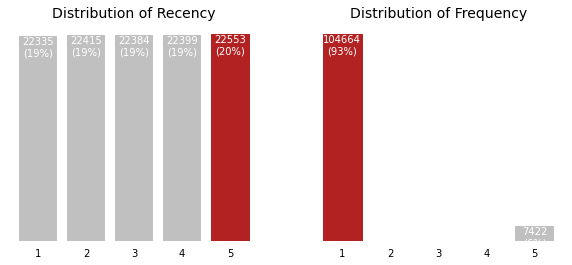

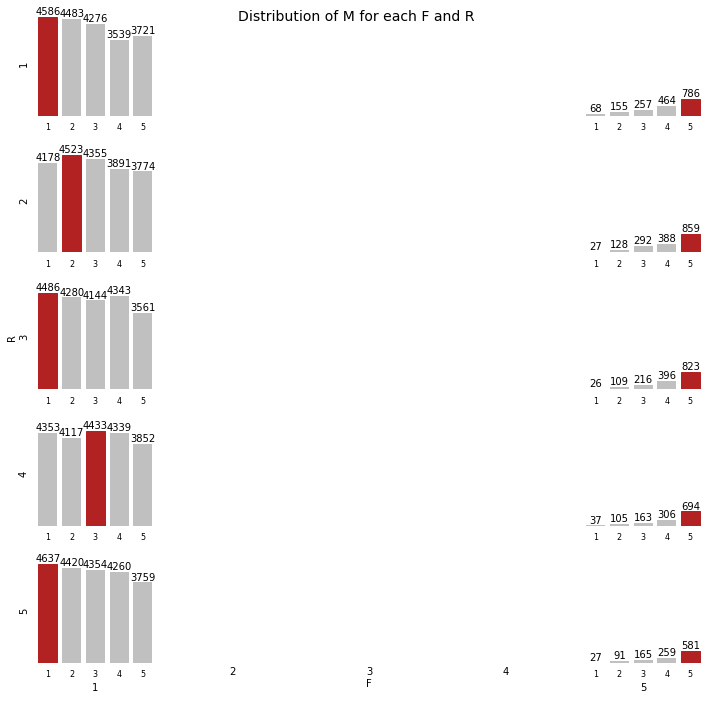

In [67]:
# Визуализируйте сегменты наших клиентов
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()